## Name: Sai Surya Salalith Mantha
## Email: Saisurym@usc.edu
## USC ID: 9463553709

### Steps Involved:

1. Read the source and destination Images.
2. Find the Sift feature which are key points and descriptors and overlay on the Image and display.
3. Using BFMatcher match the descriptors between each pair of Src and Dest images.
4. sort the matches according to their distances and showed top 20 by overlaying on the image.
5. Compute the Homography matrix, by applying RANSAC operation.
6. show the image matching and bounding box.

In [1]:
# Importing packages

import cv2
import numpy as np
from matplotlib import pyplot as plt
print(cv2.__version__)

3.4.2


In [2]:
# Reading Images
src_1=cv2.imread("src_1.jpg",0)
src_2=cv2.imread("src_2.jpg",0)

dst_1=cv2.imread("dst_1.jpg",0)
dst_2=cv2.imread("dst_2.jpg",0)
dst_3=cv2.imread("dst_3.jpg",0)

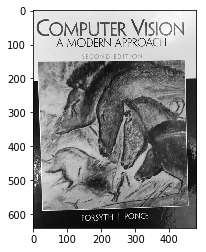

In [3]:
plt.imshow(src_1,cmap='gray')
plt.show()

In [28]:
# A function which performs all the required operations
# Input: Two images one is destination and other is source
# Output: Shows the Image Outputs

def compute(dst_1,src_1):
    # Sifit detector class Initialization
    sift = cv2.xfeatures2d.SIFT_create()
    
    # Compute sifit features KeyPoints and descriptors
    kp1, des1 = sift.detectAndCompute(dst_1,None)
    kp2, des2 = sift.detectAndCompute(src_1,None)
    
    
    print("Sift features for destination image",des1.shape[0])
    print("Sift features for source image",des2.shape[0])
    
    #overlay sift features on Images
    outdst=cv2.drawKeypoints(dst_1,kp1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    outsrc=cv2.drawKeypoints(src_1,kp2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Shows the images with sift
    from matplotlib import pyplot as plt
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 8))
    ax1.imshow(outdst)
    ax2.imshow(outsrc)
    plt.show()
    
    # Initialize BruteForce matcher
    bf = cv2.BFMatcher()
    # Match descriptors
    matches = bf.knnMatch(des1,des2, k=2)
    
    # Apply Ratio
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    # sorting according to distance
    good = sorted(good, key = lambda x:x[0].distance)
    print("Total matches for image pair",len(matches))
    print("Total Good matches for image pair",len(good))
    
    # overlay top 20 on the image and display the image
    imgBFMatcher = cv2.drawMatchesKnn(dst_1,kp1,src_1,kp2,good[:20],None,flags=2)
    plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(imgBFMatcher)
    plt.show()
    
    # minimum Matches checking
    if len(good)>10:
        
        dst_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
        src_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
        
        #computing homography matrix
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        h,w= src_1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        # overalay the bounding box
        img2 = cv2.polylines(dst_1,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    # draw inliners in green color
    draw_params = dict(matchColor = (0,255,0), singlePointColor = None,
                       matchesMask = matchesMask[:10],flags = 2)
    
    good=np.array(good).flatten()
    # overlay the matching
    img3 = cv2.drawMatches(dst_1,kp1,src_1,kp2,good[:10],None,**draw_params)
    plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

    plt.imshow(img3, 'gray')
    plt.show()
    
    print("Good Matches",mask.size)
    print("Consistent matches",matchesMask.count(1))

    
    print("Homegraphy Matrix \n",M)

Sift features for destination image 1721
Sift features for source image 3238


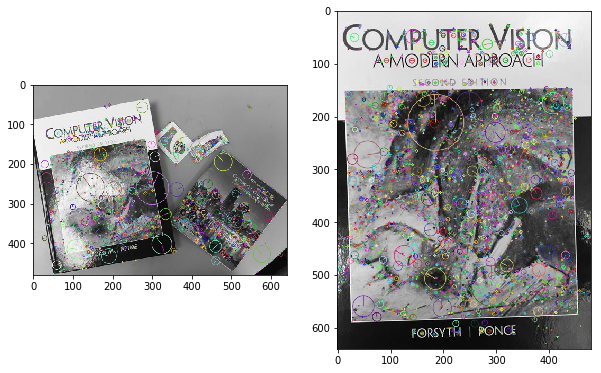

Total matches for image pair 1721
Total Good matches for image pair 374


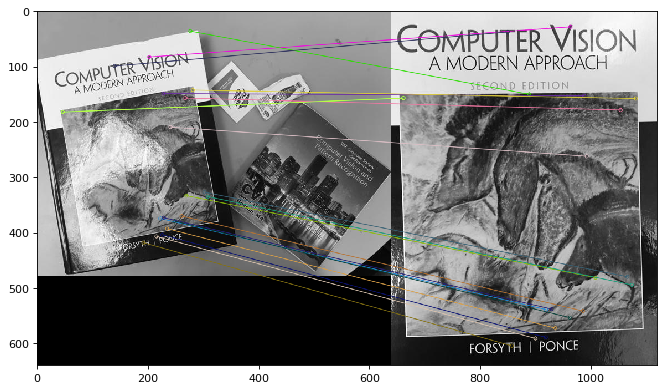

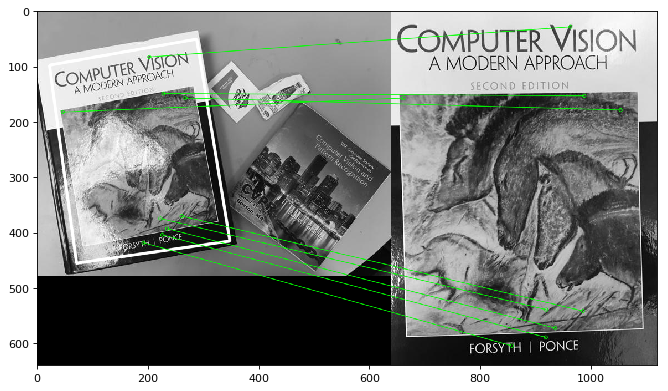

Good Matches 374
Consistent matches 351
Homegraphy Matrix 
 [[ 5.41997389e-01  7.30268711e-02  2.22040835e+01]
 [-1.01910752e-01  5.33919111e-01  9.96085457e+01]
 [-4.84624032e-05 -5.54354045e-05  1.00000000e+00]]


In [29]:
src_1=cv2.imread("src_1.jpg",0)
dst_1=cv2.imread("dst_1.jpg",0)

compute(dst_1,src_1)


Sift features for destination image 1612
Sift features for source image 3238


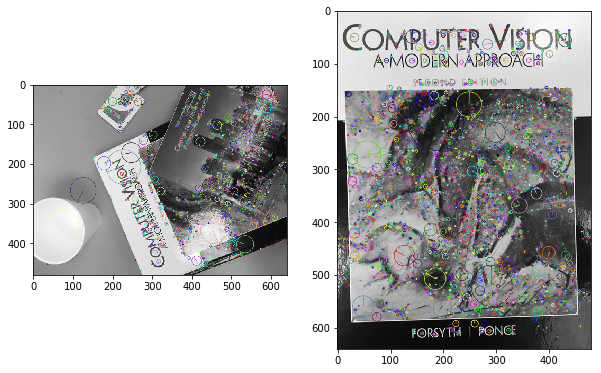

Total matches for image pair 1612
Total Good matches for image pair 198


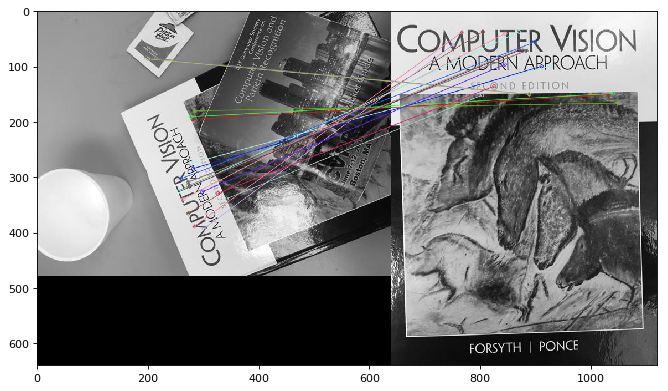

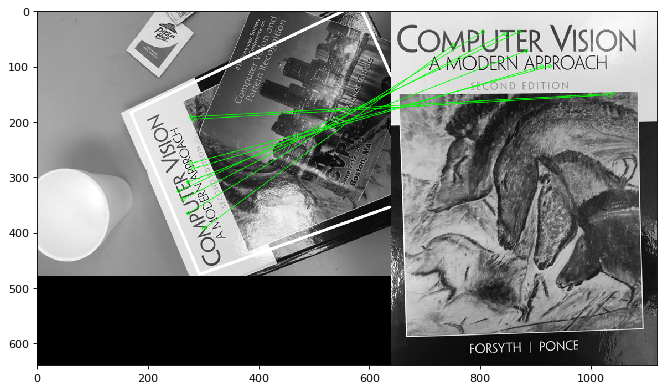

Good Matches 198
Consistent matches 163
Homegraphy Matrix 
 [[-2.53217788e-01  5.29787414e-01  2.93141831e+02]
 [-6.04529803e-01 -3.09991356e-01  4.76540054e+02]
 [ 2.72596004e-05 -2.11846445e-04  1.00000000e+00]]


In [30]:
src_1=cv2.imread("src_1.jpg",0)
dst_2=cv2.imread("dst_2.jpg",0)

compute(dst_2,src_1)

Sift features for destination image 1660
Sift features for source image 3238


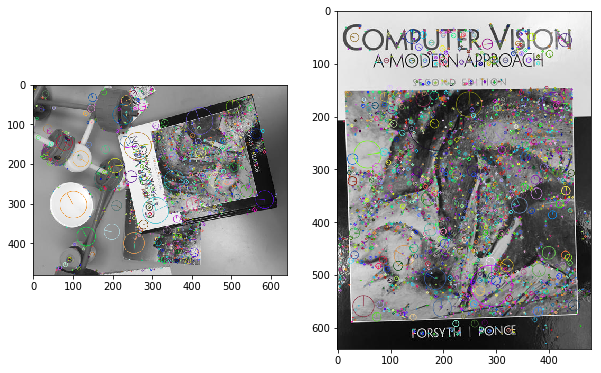

Total matches for image pair 1660
Total Good matches for image pair 542


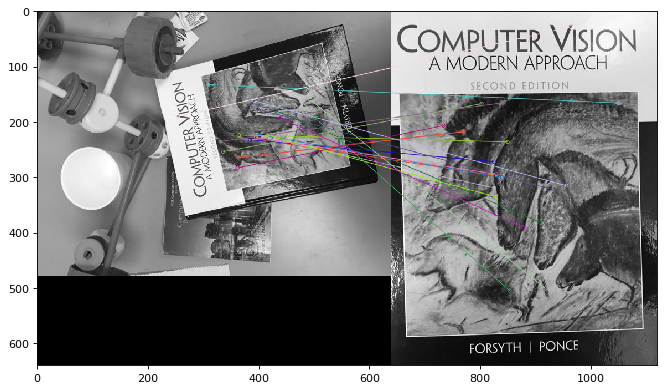

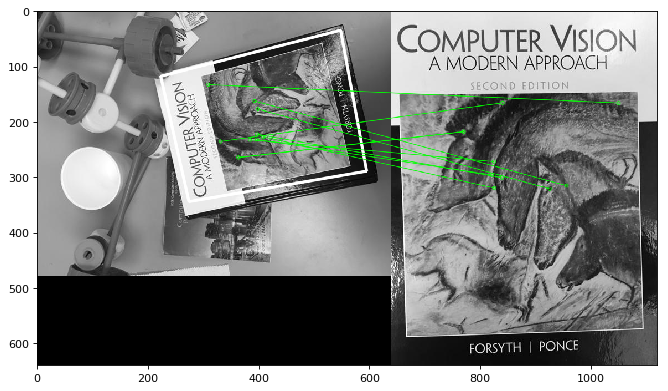

Good Matches 542
Consistent matches 520
Homegraphy Matrix 
 [[-1.17483447e-01  4.08087615e-01  2.74438450e+02]
 [-4.76932116e-01 -1.32853624e-01  3.45400956e+02]
 [-5.10173574e-05 -1.59525530e-04  1.00000000e+00]]


In [31]:
src_1=cv2.imread("src_1.jpg",0)
dst_3=cv2.imread("dst_3.jpg",0)

compute(dst_3,src_1)

Sift features for destination image 1721
Sift features for source image 2830


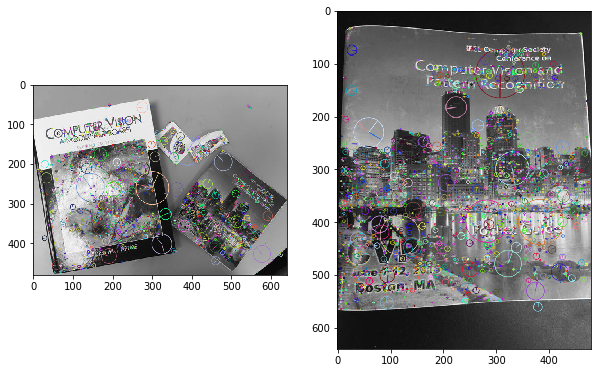

Total matches for image pair 1721
Total Good matches for image pair 192


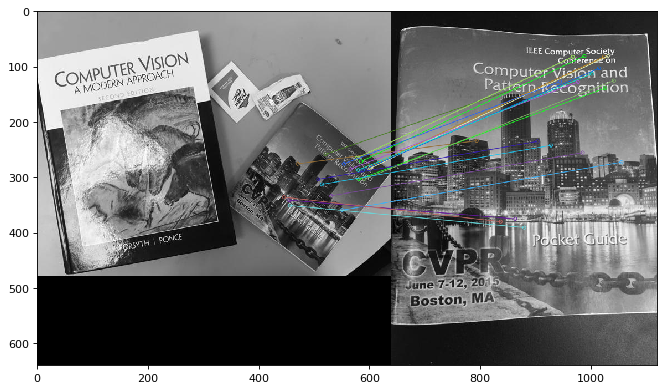

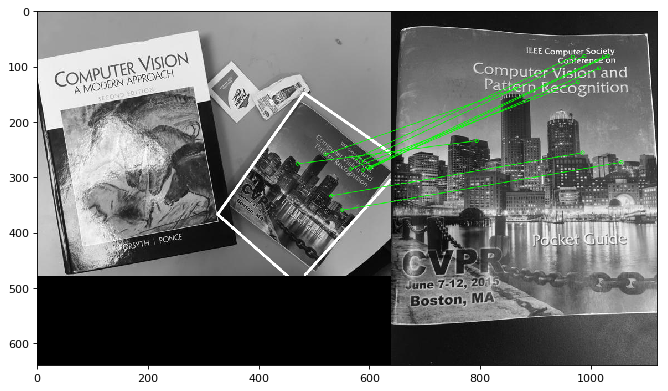

Good Matches 192
Consistent matches 175
Homegraphy Matrix 
 [[ 2.57478639e-01 -1.63566814e-01  4.82872048e+02]
 [ 2.12850382e-01  4.32136853e-01  1.49927960e+02]
 [-1.86933412e-04  2.46220916e-04  1.00000000e+00]]


In [32]:
src_2=cv2.imread("src_2.jpg",0)
dst_1=cv2.imread("dst_1.jpg",0)

compute(dst_1,src_2)

Sift features for destination image 1612
Sift features for source image 2830


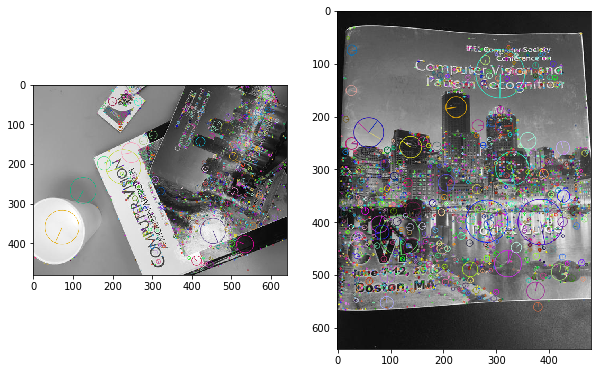

Total matches for image pair 1612
Total Good matches for image pair 236


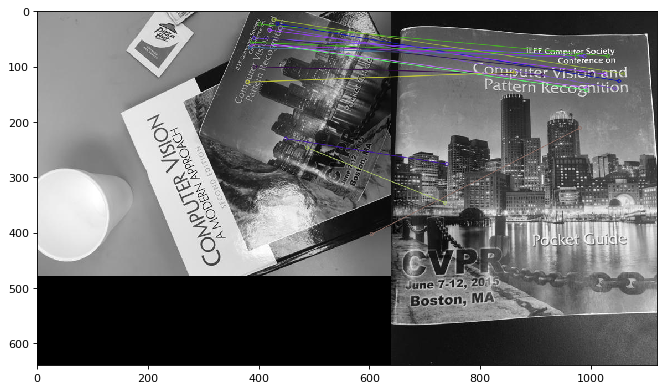

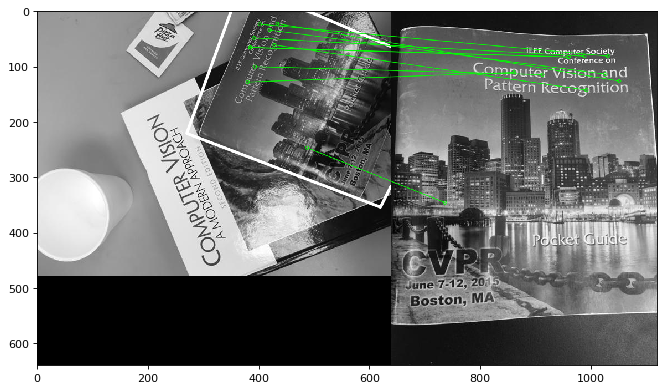

Good Matches 236
Consistent matches 209
Homegraphy Matrix 
 [[ 1.39304844e-01  6.04655067e-01  2.70800591e+02]
 [-5.61512799e-01  2.40393931e-01  2.22656110e+02]
 [-1.79198265e-04  9.34751261e-05  1.00000000e+00]]


In [33]:
src_2=cv2.imread("src_2.jpg",0)
dst_2=cv2.imread("dst_2.jpg",0)

compute(dst_2,src_2)

Sift features for destination image 1660
Sift features for source image 2830


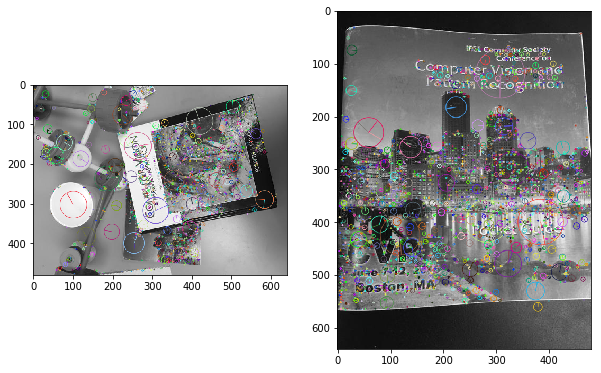

Total matches for image pair 1660
Total Good matches for image pair 47


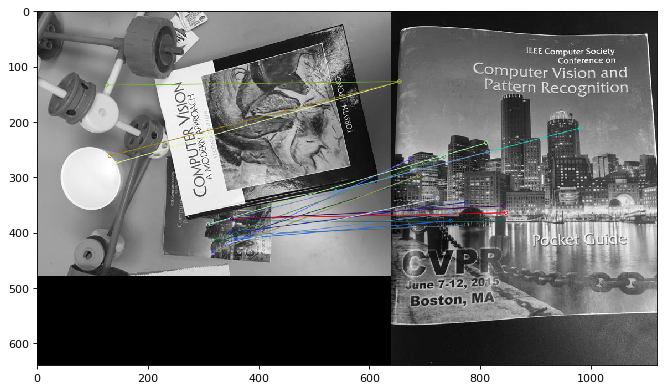

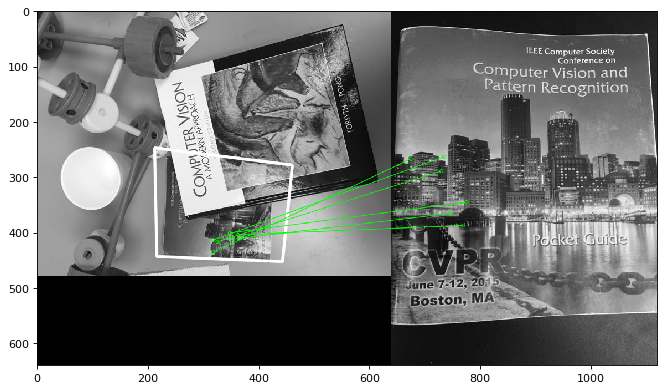

Good Matches 47
Consistent matches 34
Homegraphy Matrix 
 [[-5.18808336e-02  4.25419220e-01  2.16614664e+02]
 [-4.59194858e-01  8.70550483e-02  4.44422172e+02]
 [-2.04428634e-04  1.59179809e-04  1.00000000e+00]]


In [34]:
src_2=cv2.imread("src_2.jpg",0)
dst_3=cv2.imread("dst_3.jpg",0)

compute(dst_3,src_2)

# Analysis

# Sifit:
      Sift is feature detection algorithm to detect the local features.
#### In the above images:
   we can easily observe that sift features were representing the regions which are important, adn ignoring the regions where there are no significant changes or key areas. for example the sift keypoints were generated on the books, cup and toys but not in the take as table is quite uniform and there are no key areas which are unique on table.

# Homography:
        In the field of computer vision, any two images of the same planar surface in space are related by a homography (assuming a pinhole camera model). This has many practical applications, such as image rectification, image registration, or computation of camera motion—rotation and translation—between two images.
        

# RANSAC: 
    The RANSAC algorithm is a learning technique to estimate parameters of a model by random sampling of observed data. Given a dataset whose data elements contain both inliers and outliers, RANSAC uses the voting scheme to find the optimal fitting result. Data elements in the dataset are used to vote for one or multiple models. 

#### In the above images:
 
* Initially, Sift features gave the appropriate key features for books, toys and items in the backgroud. It even gave features for the text and patterns on the book.


* After applying brute-force mathcer adn taking top-20 matches, the results were good but not fully accurate, as some lines connected backgorund toys to foreground of the books in the source image. 
    example: if we observe the src-1 and dst-2 there is line matching pizza hut packet and the book.


* After applying homography, we can observe that the accuracy of the matching got improved at the same time the bouding box also generated in the. We can easily observe the in image src-1 the book is not completely given, borders on the four sides were got trimmed, and the same is replicated in the des-1,2,3. In Src-2 there is huge border along with book. when finding bounding boxes for src-2 in des-1,2,3 the extra space around the book is shown and it keep on distorting and became very huge in des-3 compared to des-1.


* In conlcusion the source image should be taken very carefully as extra edges or cutting the important edges will propagate to the destination images and distortions will more with change in scale of the image